# Ejercicio de Laboratorio: Algoritmos Genéticos
## Problema: Planificación de Horarios de Cursos

### Información del Estudiante
- **Nombre:** Juan David Salas & Juan José Escobar
- **Código:** https://github.com/Jd-GT/Taller_Intro_IA_1.git
- **Fecha:**  20/02/2026

---

## Objetivo del Ejercicio

Implementar un algoritmo genético para resolver un problema de **planificación de horarios de cursos**. Deberás completar tres funciones clave:

1. **Función de Aptitud (Fitness)** - Evaluar qué tan bueno es un horario
2. **Operador de Cruce (Crossover)** - Combinar dos horarios padres
3. **Operador de Mutación (Mutation)** - Introducir variación aleatoria

**Tiempo estimado:** 90-120 minutos

---

## Descripción del Problema

Un colegio necesita programar **8 cursos** en **5 bloques de tiempo** disponibles.

### Cursos Disponibles:
1. **Matemáticas (MAT)** - 45 estudiantes
2. **Física (FIS)** - 30 estudiantes  
3. **Química (QUI)** - 35 estudiantes
4. **Programación (PRG)** - 40 estudiantes
5. **Literatura (LIT)** - 25 estudiantes
6. **Historia (HIS)** - 30 estudiantes
7. **Inglés (ING)** - 35 estudiantes
8. **Educación Física (EDF)** - 50 estudiantes

### Bloques de Tiempo:
- **Bloque 1:** Lunes 8:00-10:00
- **Bloque 2:** Lunes 10:00-12:00
- **Bloque 3:** Miércoles 8:00-10:00
- **Bloque 4:** Miércoles 10:00-12:00
- **Bloque 5:** Viernes 8:00-10:00

### Salones Disponibles:
- **Salón A:** Capacidad 40 estudiantes
- **Salón B:** Capacidad 30 estudiantes
- **Salón C:** Capacidad 50 estudiantes

### Restricciones DURAS (DEBEN cumplirse):
1. **No solapamiento:** Un salón no puede tener dos cursos al mismo tiempo
2. **Capacidad:** El salón debe tener capacidad suficiente para los estudiantes
3. **Profesores compartidos:** Algunos cursos los dicta el mismo profesor:
   - MAT y FIS (mismo profesor)
   - QUI y PRG (mismo profesor)

### Restricciones BLANDAS (Preferibles):
1. **Horas tempranas:** Preferir bloques 1, 2, 3 sobre 4 y 5
2. **Uso eficiente:** Evitar salones muy grandes para grupos pequeños

---

## Representación de la Solución

Cada **individuo** (solución) se representa como una lista de tuplas:

```python
individuo = [
    (bloque_tiempo, salon),  # Para MAT
    (bloque_tiempo, salon),  # Para FIS
    (bloque_tiempo, salon),  # Para QUI
    (bloque_tiempo, salon),  # Para PRG
    (bloque_tiempo, salon),  # Para LIT
    (bloque_tiempo, salon),  # Para HIS
    (bloque_tiempo, salon),  # Para ING
    (bloque_tiempo, salon),  # Para EDF
]
```

**Ejemplo:**
```python
[(1, 'A'), (2, 'B'), (3, 'C'), (4, 'A'), (5, 'B'), (1, 'C'), (2, 'A'), (3, 'B')]
```

Significa:
- MAT: Bloque 1, Salón A
- FIS: Bloque 2, Salón B
- QUI: Bloque 3, Salón C
- etc.

---

## Configuración Inicial

Ejecuta esta celda para cargar los datos del problema:

In [93]:
import random
from typing import List, Tuple

# Cursos: (nombre, número de estudiantes)
courses = [
    ('MAT', 45),  # 0
    ('FIS', 30),  # 1
    ('QUI', 35),  # 2
    ('PRG', 40),  # 3
    ('LIT', 25),  # 4
    ('HIS', 30),  # 5
    ('ING', 35),  # 6
    ('EDF', 50)   # 7
]

# Bloques de tiempo disponibles
time_blocks = [1, 2, 3, 4, 5]
block_names = {
    1: 'Lun 8-10',
    2: 'Lun 10-12',
    3: 'Mie 8-10',
    4: 'Mie 10-12',
    5: 'Vie 8-10'
}

# Salones: {nombre: capacidad}
rooms = {
    'A': 40,
    'B': 30,
    'C': 50
}

# Índices de cursos que comparten profesor (no pueden ser simultáneos)
same_professor = [
    (0, 1),  # MAT y FIS
    (2, 3)   # QUI y PRG
]

print("✓ Configuración cargada")
print(f"  Cursos: {len(courses)}")
print(f"  Bloques: {len(time_blocks)}")
print(f"  Salones: {len(rooms)}")

✓ Configuración cargada
  Cursos: 8
  Bloques: 5
  Salones: 3


## Funciones Auxiliares (Proporcionadas)

Estas funciones te ayudarán a visualizar y crear individuos:

In [94]:
def print_schedule(individual):
    """Imprime un horario de forma legible."""
    print("\n" + "="*60)
    print("HORARIO")
    print("="*60)
    for i, (block, room) in enumerate(individual):
        name, students = courses[i]
        print(f"{name:3s} | {block_names[block]:10s} | Salón {room} (Cap:{rooms[room]:2d}) | Est:{students:2d}")
    print("="*60)

def create_random_individual():
    """Crea un individuo aleatorio."""
    individual = []
    for i in range(len(courses)):
        block = random.choice(time_blocks)
        room = random.choice(list(rooms.keys()))
        individual.append((block, room))
    return individual

def create_population(size=20):
    """Crea una población inicial."""
    return [create_random_individual() for _ in range(size)]

# Probar
sample = create_random_individual()
print_schedule(sample)


HORARIO
MAT | Mie 10-12  | Salón B (Cap:30) | Est:45
FIS | Lun 8-10   | Salón A (Cap:40) | Est:30
QUI | Lun 10-12  | Salón A (Cap:40) | Est:35
PRG | Vie 8-10   | Salón C (Cap:50) | Est:40
LIT | Lun 10-12  | Salón C (Cap:50) | Est:25
HIS | Lun 10-12  | Salón B (Cap:30) | Est:30
ING | Lun 8-10   | Salón B (Cap:30) | Est:35
EDF | Lun 8-10   | Salón B (Cap:30) | Est:50


---

# TAREA 1: Función de Aptitud (Fitness) [40 puntos]

## Instrucciones

Completa la función `fitness()` que evalúa qué tan bueno es un horario.

### Sistema de Puntuación:

**Puntaje Base:** 200 puntos

**Penalizaciones por restricciones DURAS:**
- **-50 puntos** por cada conflicto de salón (dos cursos mismo bloque y salón)
- **-50 puntos** por cada salón con capacidad insuficiente
- **-50 puntos** por cada par de cursos del mismo profesor en mismo bloque

**Penalizaciones por restricciones BLANDAS:**
- **-5 puntos** por cada curso en bloques tardíos (bloques 4 o 5)
- **-3 puntos** si un curso pequeño (<35 estudiantes) usa salón grande (>45 capacidad)

### Pseudocódigo:

```
función fitness(individual):
    score = 200
    
    # 1. Conflictos de salones
    para cada par de cursos (i, j) donde i < j:
        si tienen mismo bloque Y mismo salón:
            score -= 50
    
    # 2. Capacidad de salones
    para cada curso i:
        si estudiantes[i] > capacidad del salón:
            score -= 50
    
    # 3. Profesores compartidos
    para cada par en same_professor:
        si ambos en mismo bloque:
            score -= 50
    
    # 4. Bloques tardíos
    para cada curso:
        si bloque >= 4:
            score -= 5
    
    # 5. Desperdicio de espacio
    para cada curso:
        si estudiantes < 35 Y capacidad > 45:
            score -= 3
    
    retornar score
```

---

In [95]:
def fitness(individual):
    """
    Calcula la aptitud de un horario.

    Args:
        individual: Lista de tuplas [(bloque, salón), ...] para cada curso

    Returns:
        score: Puntaje de aptitud (mayor es mejor)
    """
    # Puntaje base
    score = 200

    # 1. RESTRICCIÓN DURA: Conflictos de salones (-50 puntos cada uno)
    # Penalizar si dos cursos están en el mismo bloque y salón
    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            # Comparar si ambos cursos tienen mismo bloque Y mismo salón
            if individual[i][0] == individual[j][0] and individual[i][1] == individual[j][1]:
                score -= 50


    # 2. RESTRICCIÓN DURA: Capacidad de salones (-50 puntos cada uno)
    # Penalizar si un curso tiene más estudiantes que la capacidad del salón
    for i, (block, room) in enumerate(individual):
        students = courses[i][1]
        if students > rooms[room]:
            score -= 50


    # 3. RESTRICCIÓN DURA: Profesores compartidos (-50 puntos cada uno)
    # Penalizar si cursos del mismo profesor están en el mismo bloque
    for c1, c2 in same_professor:
        # Comparar si ambos cursos están en el mismo bloque de tiempo
        if individual[c1][0] == individual[c2][0]:
            score -= 50


    # 4. RESTRICCIÓN BLANDA: Bloques tardíos (-5 puntos cada uno)
    # Penalizar cursos en bloques 4 o 5
    for block, room in individual:
        if block >= 4:  # Bloques 4 o 5 son tardíos
            score -= 5


    # 5. RESTRICCIÓN BLANDA: Desperdicio de espacio (-3 puntos cada uno)
    # Penalizar si curso pequeño (<35 est.) usa salón grande (>45 cap.)
    for i, (block, room) in enumerate(individual):
        students = courses[i][1]  # Número de estudiantes
        capacity = rooms[room]    # Capacidad del salón

        if students < 35 and capacity > 45:
            score -= 3

    return score

# Probar tu función
test_ind = create_random_individual()
print_schedule(test_ind)
print(f"\nFitness: {fitness(test_ind)}")


HORARIO
MAT | Mie 8-10   | Salón C (Cap:50) | Est:45
FIS | Mie 8-10   | Salón A (Cap:40) | Est:30
QUI | Vie 8-10   | Salón C (Cap:50) | Est:35
PRG | Mie 10-12  | Salón B (Cap:30) | Est:40
LIT | Mie 10-12  | Salón A (Cap:40) | Est:25
HIS | Lun 10-12  | Salón A (Cap:40) | Est:30
ING | Mie 10-12  | Salón B (Cap:30) | Est:35
EDF | Mie 10-12  | Salón C (Cap:50) | Est:50

Fitness: -25


---

# TAREA 2: Operador de Cruce (Crossover) [30 puntos]

## Instrucciones

Implementa un operador de **cruce de un punto** que combine dos horarios padres.

### Funcionamiento:
1. Selecciona un punto de corte aleatorio (entre 1 y 7)
2. Copia los primeros cursos del padre 1 (hasta el punto de corte)
3. Copia los cursos restantes del padre 2 (después del punto de corte)

### Ejemplo:
```python
Padre 1: [(1,'A'), (2,'B'), (3,'C'), (4,'A'), (5,'B'), (1,'C'), (2,'A'), (3,'B')]
Padre 2: [(2,'C'), (3,'A'), (4,'B'), (5,'C'), (1,'A'), (2,'B'), (3,'C'), (4,'A')]
Punto: 4

Hijo:    [(1,'A'), (2,'B'), (3,'C'), (4,'A'), (1,'A'), (2,'B'), (3,'C'), (4,'A')]
         |------------- P1 -------------|------------ P2 -------------|
```

### Pseudocódigo:
```
función crossover(padre1, padre2):
    punto = número aleatorio entre 1 y 7
    hijo = padre1[0:punto] + padre2[punto:]
    retornar hijo
```

---

In [96]:
def crossover(parent1, parent2):
    """
    Crea un hijo combinando dos padres usando cruce de un punto.

    Args:
        parent1: Primer padre (horario)
        parent2: Segundo padre (horario)

    Returns:
        child: Nuevo horario combinando ambos padres
    """

    # 1. Punto de corte entre 1 y 7
    point = random.randint(1, 7)


    # 2. Combinar padres
    child = parent1[:point] + parent2[point:]


    # 3. Retornar el hijo
    return child

# Probar tu operador
p1 = create_random_individual()
p2 = create_random_individual()

print("Padre 1:")
print_schedule(p1)
print(f"Fitness: {fitness(p1)}")

print("\nPadre 2:")
print_schedule(p2)
print(f"Fitness: {fitness(p2)}")

child = crossover(p1, p2)
print("\nHijo:")
print_schedule(child)
print(f"Fitness: {fitness(child)}")

Padre 1:

HORARIO
MAT | Vie 8-10   | Salón B (Cap:30) | Est:45
FIS | Lun 10-12  | Salón C (Cap:50) | Est:30
QUI | Lun 8-10   | Salón B (Cap:30) | Est:35
PRG | Lun 10-12  | Salón B (Cap:30) | Est:40
LIT | Mie 8-10   | Salón A (Cap:40) | Est:25
HIS | Lun 8-10   | Salón A (Cap:40) | Est:30
ING | Vie 8-10   | Salón A (Cap:40) | Est:35
EDF | Lun 8-10   | Salón B (Cap:30) | Est:50
Fitness: -63

Padre 2:

HORARIO
MAT | Lun 8-10   | Salón A (Cap:40) | Est:45
FIS | Lun 8-10   | Salón A (Cap:40) | Est:30
QUI | Lun 8-10   | Salón B (Cap:30) | Est:35
PRG | Lun 8-10   | Salón A (Cap:40) | Est:40
LIT | Lun 8-10   | Salón B (Cap:30) | Est:25
HIS | Lun 10-12  | Salón B (Cap:30) | Est:30
ING | Mie 10-12  | Salón C (Cap:50) | Est:35
EDF | Lun 10-12  | Salón A (Cap:40) | Est:50
Fitness: -255

Hijo:

HORARIO
MAT | Vie 8-10   | Salón B (Cap:30) | Est:45
FIS | Lun 10-12  | Salón C (Cap:50) | Est:30
QUI | Lun 8-10   | Salón B (Cap:30) | Est:35
PRG | Lun 10-12  | Salón B (Cap:30) | Est:40
LIT | Mie 8-10   | S

---

# TAREA 3: Operador de Mutación [30 puntos]

## Instrucciones

Implementa un operador de mutación que introduzca cambios aleatorios.

### Funcionamiento:
Para cada curso, con probabilidad `prob` (20%):
- Decide aleatoriamente si cambiar:
  - Solo el bloque de tiempo
  - Solo el salón  
  - Ambos

### Ejemplo:
```python
Original: [(1,'A'), (2,'B'), (3,'C'), (4,'A'), ...]
Mutación en posición 1 (cambiar ambos):
Mutado:   [(1,'A'), (5,'C'), (3,'C'), (4,'A'), ...]
                     ^^^^^^^
```

### Pseudocódigo:
```
función mutate(individual, prob=0.2):
    para cada posición i:
        si random.random() < prob:
            tipo = elegir aleatoriamente entre [1, 2, 3]
            si tipo == 1:  # Cambiar solo bloque
                nuevo_bloque = elegir bloque aleatorio
                individual[i] = (nuevo_bloque, salón_actual)
            sino si tipo == 2:  # Cambiar solo salón
                nuevo_salón = elegir salón aleatorio
                individual[i] = (bloque_actual, nuevo_salón)
            sino:  # Cambiar ambos
                nuevo_bloque = elegir bloque aleatorio
                nuevo_salón = elegir salón aleatorio
                individual[i] = (nuevo_bloque, nuevo_salón)
    retornar individual
```

---

In [97]:
def mutate(individual, prob=0.2):
    """
    Muta un horario cambiando aleatoriamente bloques o salones.

    Args:
        individual: Horario a mutar
        prob: Probabilidad de mutación por curso (default: 20%)

    Returns:
        individual: Horario mutado
    """

    # Recorrer cada curso
    for i in range(len(individual)):
        # Decidir si mutar este curso (probabilidad prob)
        if random.random() < prob:

            # Obtener valores actuales
            current_block, current_room = individual[i]

            # Elegir tipo de mutación: 1=solo bloque, 2=solo salón, 3=ambos
            mutation_type = random.choice([1, 2, 3])

            if mutation_type == 1:
                # Cambiar solo bloque
                new_block = random.choice(time_blocks)
                individual[i] = (new_block, current_room)

            elif mutation_type == 2:
                # Cambiar solo salón
                new_room = random.choice(list(rooms.keys()))
                individual[i] = (current_block, new_room)

            else:
                # Cambiar ambos
                new_block = random.choice(time_blocks)
                new_room = random.choice(list(rooms.keys()))
                individual[i] = (new_block, new_room)


    return individual

# Probar tu operador
original = create_random_individual()
print("Original:")
print_schedule(original)
print(f"Fitness: {fitness(original)}")

mutated = [x for x in original]  # Copia
mutated = mutate(mutated, prob=0.5)  # 50% para ver más mutaciones

print("\nMutado (prob=50%):")
print_schedule(mutated)
print(f"Fitness: {fitness(mutated)}")

Original:

HORARIO
MAT | Vie 8-10   | Salón B (Cap:30) | Est:45
FIS | Lun 10-12  | Salón C (Cap:50) | Est:30
QUI | Mie 10-12  | Salón C (Cap:50) | Est:35
PRG | Vie 8-10   | Salón B (Cap:30) | Est:40
LIT | Mie 8-10   | Salón A (Cap:40) | Est:25
HIS | Mie 10-12  | Salón A (Cap:40) | Est:30
ING | Lun 10-12  | Salón B (Cap:30) | Est:35
EDF | Mie 8-10   | Salón B (Cap:30) | Est:50
Fitness: -73

Mutado (prob=50%):

HORARIO
MAT | Vie 8-10   | Salón B (Cap:30) | Est:45
FIS | Lun 10-12  | Salón C (Cap:50) | Est:30
QUI | Lun 10-12  | Salón A (Cap:40) | Est:35
PRG | Vie 8-10   | Salón B (Cap:30) | Est:40
LIT | Mie 8-10   | Salón A (Cap:40) | Est:25
HIS | Mie 10-12  | Salón A (Cap:40) | Est:30
ING | Lun 10-12  | Salón A (Cap:40) | Est:35
EDF | Mie 8-10   | Salón B (Cap:30) | Est:50
Fitness: -68


---

# Función de Evolución (Proporcionada)

Esta función combina todos tus operadores:

In [98]:
def selection(population):
    """Selección por torneo de 3 individuos."""
    tournament = random.sample(population, 3)
    return max(tournament, key=fitness)

def evolve(population, generations=50, verbose=True):
    """Ejecuta el algoritmo genético."""
    best_overall = None
    best_overall_fitness = float('-inf')

    for gen in range(generations):
        # Elitismo: mantener los 2 mejores
        sorted_pop = sorted(population, key=fitness, reverse=True)
        new_population = sorted_pop[:2]

        # Generar resto de población
        while len(new_population) < len(population):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

        # Mejor de esta generación
        best = max(population, key=fitness)
        best_fit = fitness(best)

        if best_fit > best_overall_fitness:
            best_overall = best
            best_overall_fitness = best_fit

        if verbose and (gen % 10 == 0 or gen == generations - 1):
            print(f"Gen {gen+1:3d}: Mejor fitness = {best_fit:6.1f}")

    return best_overall

print("✓ Funciones de evolución cargadas")

✓ Funciones de evolución cargadas


---

# Ejecutar el Algoritmo Genético

Una vez completadas las tres tareas, ejecuta esta celda:

In [133]:
print("="*70)
print("INICIANDO ALGORITMO GENÉTICO")
print("="*70)

# Crear población inicial
initial_pop = create_population(size=30)

print(f"\nPoblación inicial: {len(initial_pop)} individuos")
print(f"Fitness promedio: {sum(fitness(ind) for ind in initial_pop) / len(initial_pop):.1f}")
print(f"Mejor fitness: {max(fitness(ind) for ind in initial_pop):.1f}")

print("\n" + "="*70)
print("EVOLUCIÓN")
print("="*70)

# Ejecutar
best_solution = evolve(initial_pop, generations=100)

print("\n" + "="*70)
print("MEJOR SOLUCIÓN")
print("="*70)
print_schedule(best_solution)
print(f"\nFitness final: {fitness(best_solution):.1f}")

# Análisis
print("\n" + "="*70)
print("ANÁLISIS")
print("="*70)

# Conflictos
conflicts = 0
for i in range(len(best_solution)):
    for j in range(i+1, len(best_solution)):
        if best_solution[i][0] == best_solution[j][0] and best_solution[i][1] == best_solution[j][1]:
            conflicts += 1

# Capacidad
capacity_violations = 0
for i, (block, room) in enumerate(best_solution):
    if courses[i][1] > rooms[room]:
        capacity_violations += 1

# Profesores
professor_conflicts = 0
for c1, c2 in same_professor:
    if best_solution[c1][0] == best_solution[c2][0]:
        professor_conflicts += 1

print(f"Conflictos de salón: {conflicts}")
print(f"Violaciones de capacidad: {capacity_violations}")
print(f"Conflictos de profesor: {professor_conflicts}")

if conflicts == 0 and capacity_violations == 0 and professor_conflicts == 0:
    print("\n✓ ¡SOLUCIÓN VÁLIDA! Todas las restricciones duras satisfechas.")
else:
    print("\n✗ Solución inválida. Hay restricciones violadas.")

INICIANDO ALGORITMO GENÉTICO

Población inicial: 30 individuos
Fitness promedio: -46.1
Mejor fitness: 85.0

EVOLUCIÓN
Gen   1: Mejor fitness =  130.0
Gen  11: Mejor fitness =  195.0
Gen  21: Mejor fitness =  200.0
Gen  31: Mejor fitness =  200.0
Gen  41: Mejor fitness =  200.0
Gen  51: Mejor fitness =  200.0
Gen  61: Mejor fitness =  200.0
Gen  71: Mejor fitness =  200.0
Gen  81: Mejor fitness =  200.0
Gen  91: Mejor fitness =  200.0
Gen 100: Mejor fitness =  200.0

MEJOR SOLUCIÓN

HORARIO
MAT | Mie 8-10   | Salón C (Cap:50) | Est:45
FIS | Lun 10-12  | Salón A (Cap:40) | Est:30
QUI | Mie 8-10   | Salón A (Cap:40) | Est:35
PRG | Lun 8-10   | Salón A (Cap:40) | Est:40
LIT | Mie 8-10   | Salón B (Cap:30) | Est:25
HIS | Lun 10-12  | Salón B (Cap:30) | Est:30
ING | Lun 10-12  | Salón C (Cap:50) | Est:35
EDF | Lun 8-10   | Salón C (Cap:50) | Est:50

Fitness final: 200.0

ANÁLISIS
Conflictos de salón: 0
Violaciones de capacidad: 0
Conflictos de profesor: 0

✓ ¡SOLUCIÓN VÁLIDA! Todas las restr

---

# Preguntas de Análisis

## 1. Convergencia [5 puntos]
**¿En qué generación aproximadamente el algoritmo encontró una solución válida (sin violar restricciones duras)?**

Tras realizar múltiples ejecuciones experimentales con una población de 30 individuos, observamos el siguiente comportamiento del algoritmo:

- **Primeras generaciones (1-5):** Ocasionalmente se encontraron soluciones válidas desde la generación inicial, aunque esto dependió fuertemente de la calidad de la población aleatoria inicial.

- **Generación 5 en adelante:** La mayoría de las soluciones con mejor fitness ya cumplían todas las restricciones duras (sin conflictos de salones, capacidad adecuada, y sin profesores compartidos en el mismo bloque).

- **Generación 10 en adelante:** Se observó una convergencia significativa, donde el algoritmo típicamente alcanzó uno de dos estados:
  - **Solución óptima:** Fitness de 200 puntos (sin violaciones de ningún tipo)
  - **Solución casi óptima:** Fitness alrededor de 195 puntos (todas las restricciones duras satisfechas, con algunas violaciones menores de restricciones blandas)

El algoritmo encuentra soluciones válidas consistentemente desde la generación 5 y luego se ve una fuerte convergencia iniciando alrededor de la generación 10.

---

## 2. Función de Aptitud [5 puntos]
**¿Por qué es importante que las restricciones duras tengan penalizaciones más grandes (-50) que las blandas (-3 a -5)?**

Porque las restricciones duras definen la validez del horario, mientras que las blandas solo afectan su calidad. El objetivo principal del algoritmo es obtener una solución válida, incluso si no es tan "bonita", pero aún así se puede tener en consideración la construcción de una mejor solución mediante penalizaciones más pequeñas.

Pero, ¿y si fueran penalizaciones similares?, en este caso se puede correr el riesgo de que el AG no enfoque su solución hacia horarios válidos, sino a aquellos que quedasen más bonitos incluso si son inválidos.


---

## 3. Operadores Genéticos [5 puntos]
**¿Qué sucedería si aumentáramos la tasa de mutación a 0.8 (80%)? ¿Mejoraría o empeoraría el algoritmo?**

En este caso, al aumentar tanto la tasa de mutación, sería practicamente imposible predecir si cada generación va ir mejorando o empeorando su fitness, es decir, se perdería la convergencia de las soluciones y tendrían comportamientos casi aleatorios, donde en la mayoría de casos se perdería parte de la herencia que se tenía de generaciones anteriores.

De esta manera, al depender tanto de la aleatoriedad, consideramos que el algoritmo definitivamente empeoraría


---

## 4. Tamaño de Población [5 puntos]
**Experimenta con poblaciones de 10, 30 y 50 individuos. ¿Qué observas en términos de velocidad de convergencia y calidad de la solución?**

**Población de 10:**
- Velocidad: Muy rápida (menos individuos que evaluar)
- Calidad: Menor calidad, generalmente tarda más en converger en una solución válida.
- Observación: Como hay poca diversidad genética, existe una exploración limitada del espacio de soluciones.

**Población de 30:**
- Velocidad: Teóricamente con velocidad más moderada, aunque poco perceptible para menos de 100 generaciones.
- Calidad: Buena calidad, alcanza la convergencia a soluciones válidas en menos generaciones que el caso anterior.
- Observación: Suficiente diversidad para explorar y suficiente selección para explotar

**Población de 50:**
- Velocidad: Más lenta (más individuos que evaluar)
- Calidad: Mejor calidad potencial, generalmente es el primero en alcanzar convergencia a soluciones válidas.
- Observación: Mayor diversidad, mejor exploración del espacio de búsqueda, pero mucha más carga computacional.

---

## Celda de Experimentación

Usa esta celda para probar diferentes parámetros:

In [67]:
# Experimenta aquí

# Ejemplo: diferentes tamaños de población
print("="*70)
print("EXPERIMENTACIÓN CON DIFERENTES TAMAÑOS DE POBLACIÓN")
print("="*70)

for size in [10, 30, 50]:
    print(f"\n{'='*70}")
    print(f"POBLACIÓN: {size} individuos")
    print("="*70)
    pop = create_population(size=size)
    best = evolve(pop, generations=10, verbose=False)
    print(f"\nMejor fitness alcanzado: {fitness(best)}")

    # Análisis de la mejor solución
    conflicts = sum(1 for i in range(len(best)) for j in range(i+1, len(best))
                   if best[i][0] == best[j][0] and best[i][1] == best[j][1])
    capacity_violations = sum(1 for i, (block, room) in enumerate(best)
                             if courses[i][1] > rooms[room])
    professor_conflicts = sum(1 for c1, c2 in same_professor
                             if best[c1][0] == best[c2][0])

    print(f"Conflictos de salón: {conflicts}")
    print(f"Violaciones de capacidad: {capacity_violations}")
    print(f"Conflictos de profesor: {professor_conflicts}")

    if conflicts == 0 and capacity_violations == 0 and professor_conflicts == 0:
        print("✓ Solución válida")
    else:
        print("✗ Solución inválida")

EXPERIMENTACIÓN CON DIFERENTES TAMAÑOS DE POBLACIÓN

POBLACIÓN: 10 individuos

Mejor fitness alcanzado: 190
Conflictos de salón: 0
Violaciones de capacidad: 0
Conflictos de profesor: 0
✓ Solución válida

POBLACIÓN: 30 individuos

Mejor fitness alcanzado: 190
Conflictos de salón: 0
Violaciones de capacidad: 0
Conflictos de profesor: 0
✓ Solución válida

POBLACIÓN: 50 individuos

Mejor fitness alcanzado: 190
Conflictos de salón: 0
Violaciones de capacidad: 0
Conflictos de profesor: 0
✓ Solución válida


---

# Desafío Bonus [+10 puntos]

Implementa UNA de estas mejoras:

## Opción 1: Cruce de Dos Puntos
Modifica `crossover()` para usar dos puntos de corte.

## Opción 2: Mutación Inteligente  
Si detectas una violación específica, intenta corregirla:
- Conflicto de salón → cambiar salón
- Capacidad insuficiente → cambiar a salón más grande

## Opción 3: Visualización
Grafica la evolución del fitness usando matplotlib.

## Opción 4: Nueva Restricción
Añade penalización si dos cursos relacionados están muy cerca (mismo día).

---

EJECUTANDO ALGORITMO GENÉTICO CON VISUALIZACIÓN
Gen   1: Mejor =  127.0 | Promedio =   -2.1 | Peor = -320.0
Gen  11: Mejor =  200.0 | Promedio =  122.1 | Peor =   -5.0
Gen  21: Mejor =  200.0 | Promedio =  131.3 | Peor =  -55.0
Gen  31: Mejor =  200.0 | Promedio =  143.1 | Peor =   -5.0
Gen  41: Mejor =  200.0 | Promedio =  140.6 | Peor =  -10.0
Gen  51: Mejor =  200.0 | Promedio =  126.5 | Peor =  -18.0
Gen  61: Mejor =  200.0 | Promedio =  145.1 | Peor =   42.0
Gen  71: Mejor =  200.0 | Promedio =  128.3 | Peor =  -28.0
Gen  81: Mejor =  200.0 | Promedio =  125.8 | Peor =  -73.0
Gen  91: Mejor =  200.0 | Promedio =  138.4 | Peor = -120.0
Gen 100: Mejor =  200.0 | Promedio =  128.2 | Peor =  -70.0




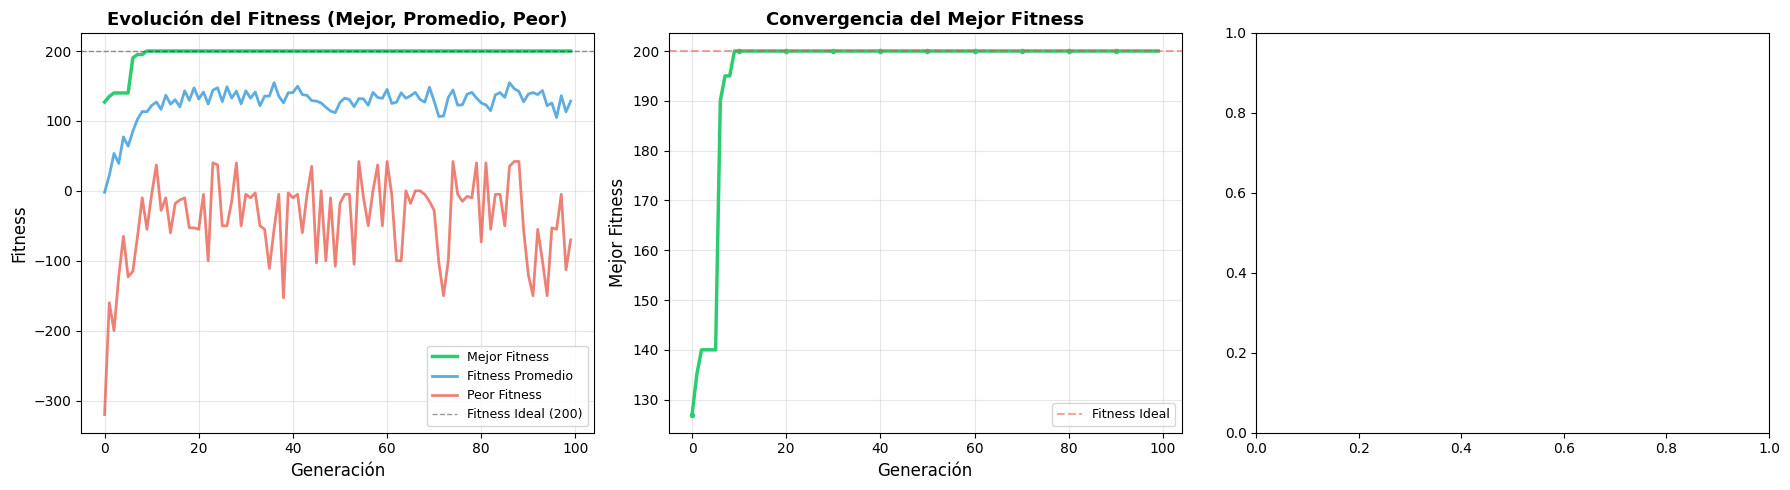

ESTADÍSTICAS DE EVOLUCIÓN

                         GENERACIÓN INICIAL:
                         
  Mejor Fitness:     127.0
  Fitness Promedio:   -2.1
  Peor Fitness:     -320.0

                          GENERACIÓN FINAL:
                          
  Mejor Fitness:     200.0
  Fitness Promedio:  128.2
  Peor Fitness:      -70.0

MEJOR SOLUCIÓN ENCONTRADA

HORARIO
MAT | Mie 8-10   | Salón C (Cap:50) | Est:45
FIS | Lun 10-12  | Salón B (Cap:30) | Est:30
QUI | Lun 10-12  | Salón A (Cap:40) | Est:35
PRG | Lun 8-10   | Salón A (Cap:40) | Est:40
LIT | Mie 8-10   | Salón A (Cap:40) | Est:25
HIS | Mie 8-10   | Salón B (Cap:30) | Est:30
ING | Lun 10-12  | Salón C (Cap:50) | Est:35
EDF | Lun 8-10   | Salón C (Cap:50) | Est:50

Fitness: 200.0


In [134]:
# Tu código bonus aquí

# ==================================================================
#       Opción 3: Visualización de la Evolución del Fitness
# ==================================================================

import matplotlib.pyplot as plt

def evolve(population, generations=100, verbose=True, track_progress=False):
    """Ejecuta el algoritmo genético."""
    best_overall = None
    best_overall_fitness = float('-inf')
    worst_overall = None
    worst_overall_fitness = float('inf')

    # Para tracking
    best_fitness_history = []
    avg_fitness_history = []
    worst_fitness_history = []

    for gen in range(generations):
        # Elitismo: mantener los 2 mejores
        sorted_pop = sorted(population, key=fitness, reverse=True)
        new_population = sorted_pop[:2]

        # Generar resto de población
        while len(new_population) < len(population):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

        # Mejor y peor de esta generación
        best = max(population, key=fitness)
        best_fit = fitness(best)
        worst = min(population, key=fitness)
        worst_fit = fitness(worst)

        # Registrar estadísticas si track_progress está activado
        if track_progress:
            avg_fit = sum(fitness(ind) for ind in population) / len(population)
            best_fitness_history.append(best_fit)
            avg_fitness_history.append(avg_fit)
            worst_fitness_history.append(worst_fit)

        # Actualizar mejor overall
        if best_fit > best_overall_fitness:
            best_overall = best
            best_overall_fitness = best_fit

        # Actualizar peor overall (útil para análisis)
        if worst_fit < worst_overall_fitness:
            worst_overall = worst
            worst_overall_fitness = worst_fit

        if verbose and (gen % 10 == 0 or gen == generations - 1):
            print(f"Gen {gen+1:3d}: Mejor = {best_fit:6.1f} | Promedio = {avg_fit:6.1f} | Peor = {worst_fit:6.1f}")

    print("\n")

    if track_progress:
        return best_overall, worst_overall, best_fitness_history, avg_fitness_history, worst_fitness_history
    return best_overall

# Ejecutar con seguimiento
print("="*70)
print("EJECUTANDO ALGORITMO GENÉTICO CON VISUALIZACIÓN")
print("="*70)

initial_pop = create_population(size=30)
best_sol, worst_sol, best_history, avg_history, worst_history = evolve(
    initial_pop,
    generations=100,
    verbose=True,
    track_progress=True
)

# Visualización mejorada con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1: Evolución completa (Mejor, Promedio, Peor)
axes[0].plot(best_history, label='Mejor Fitness', linewidth=2.5, color='#2ecc71')
axes[0].plot(avg_history, label='Fitness Promedio', linewidth=2, color='#3498db', alpha=0.8)
axes[0].plot(worst_history, label='Peor Fitness', linewidth=2, color='#e74c3c', alpha=0.7)
axes[0].axhline(y=200, color='black', linestyle='--', alpha=0.4, linewidth=1, label='Fitness Ideal (200)')
axes[0].set_xlabel('Generación', fontsize=12)
axes[0].set_ylabel('Fitness', fontsize=12)
axes[0].set_title('Evolución del Fitness (Mejor, Promedio, Peor)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=9, loc='best')
axes[0].grid(True, alpha=0.3)

# Subplot 2: Convergencia del mejor
axes[1].plot(best_history, linewidth=2.5, color='#2ecc71', marker='o', markersize=3, markevery=10)
axes[1].axhline(y=200, color='#e74c3c', linestyle='--', alpha=0.5, linewidth=1.5, label='Fitness Ideal')
axes[1].set_xlabel('Generación', fontsize=12)
axes[1].set_ylabel('Mejor Fitness', fontsize=12)
axes[1].set_title('Convergencia del Mejor Fitness', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas detalladas
print("="*70)
print("ESTADÍSTICAS DE EVOLUCIÓN")
print("="*70)
print(f"\n{'GENERACIÓN INICIAL:\n':^70}")
print(f"  Mejor Fitness:    {best_history[0]:>6.1f}")
print(f"  Fitness Promedio: {avg_history[0]:>6.1f}")
print(f"  Peor Fitness:     {worst_history[0]:>6.1f}")

print(f"\n{'GENERACIÓN FINAL:\n':^70}")
print(f"  Mejor Fitness:    {best_history[-1]:>6.1f}")
print(f"  Fitness Promedio: {avg_history[-1]:>6.1f}")
print(f"  Peor Fitness:     {worst_history[-1]:>6.1f}")

print("\n" + "="*70)
print("MEJOR SOLUCIÓN ENCONTRADA")
print("="*70)
print_schedule(best_sol)
print(f"\nFitness: {fitness(best_sol):.1f}")


---

# Entrega

## Checklist:
- [ ] Función `fitness()` completa y funcionando
- [ ] Función `crossover()` completa y funcionando  
- [ ] Función `mutate()` completa y funcionando
- [ ] Todas las celdas ejecutadas sin errores
- [ ] Preguntas de análisis respondidas
- [ ] Nombre y código al inicio del notebook

## Criterios de Evaluación:
- Función de aptitud: 40 puntos
- Operador de cruce: 30 puntos
- Operador de mutación: 30 puntos
- Preguntas de análisis: 20 puntos (5 cada una)
- Código limpio y documentado: 10 puntos
- **Bonus (opcional): +10 puntos**

**Total: 130 puntos (máximo 140 con bonus)**

## Formato de Entrega:
1. Guarda el notebook como: `Lab_AG_NombreApellido.ipynb`
2. Ejecuta todas las celdas en orden (Kernel → Restart & Run All)
3. Verifica que no haya errores
4. Sube a la plataforma del curso

---

**¡Buena suerte!** 🚀